## Reasoning 
Bayesian or probabilistic approach to statistical questions are becoming more and more popular not only in academia and science field but also in business. Even though Bayes theorem itself is not that difficult to wrap your head around, when it comes to, let's say, linear regression parameters, the calculations imidiately become much more complicated, involving such things like Markov chain Monte-Carlo, which, frankly, I feel like I don't fully understand myself. So, people decide to skip it.

In this and probably the following articles I'd like to give a couple of simple examples of how data analysts and data scientists can apply Bayes in fairly common situations, when it brings relieble and resonable outcomes and no super efforts required.

## The task

Good chunk of my experience is connected with game design. And let's say your game designer/producer comes up with an idea of new feature/game mechanics. And she believes all your players will get it and love it. During the play test with a group of 27 players only 9 people said they fully understood the idea and the mechanics. Quite a big difference with what was expected, right? How to find a concensus? Can we make conclusions based only on 26 reviews? There is no time to think and do more tests - we need to plan a release!

Excellent! This is the perfect time to shake the dust off your lectures with Bayesian stuff.

Mathematically speaking we have a _binomial process_ and need to estimate parameter $\theta$ - share of success, the rate of players who will understand and play the new mechanics.

Let's load libraries and set the key variables

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize']=(10,6)

N = 27 # Number of trials/testers
success = 9
x = np.arange(0, N+1) # All possible outcomes

In order to better understand the whole picture let's plot possible outcomes for different real $\theta$

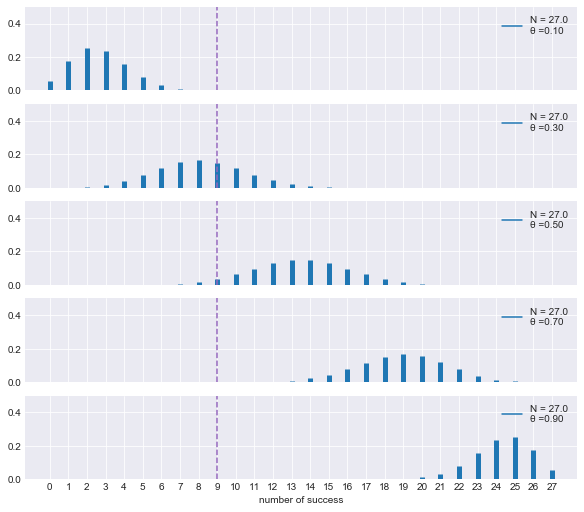

In [2]:
theta=np.linspace(0.1, 0.9, 5) # set of different possible thetas

f,ax = plt.subplots(len(theta), 1,
                    sharex=True, sharey=True,
                    figsize=(8, 7), constrained_layout=True)

for j in range(len(theta)):        
    p = theta[j]        
    y = stats.binom(n=N, p=p).pmf(x)        
    ax[j].vlines(x, 0, y, colors='C0', lw=5)        
    ax[j].set_ylim(0, 0.5)
    ax[j].plot(0, 0, label="N = {:3.1f}\nθ ={:3.2f}".format(N,p))
    ax[j].axvline(x=success, color='C4', linestyle='--')
        
    ax[j].legend()
    ax[4].set_xlabel('number of success')        
    ax[0].set_xticks(x)

We can see that $\theta$ more than 70% looks absolutely unreasonable. But the rate of 50% has some potential to be true. Probability to obtain 9 successes out of 27 trials is just 3.5% in this case. But who knows, maybe in production, with an army of our real users we will get more luck. 

In [3]:
stats.binom.pmf(success, N, 0.5)

0.034919567406177285

But in order to plan the event with this feature we need to get some boundaries for the $\theta$. The game designer agrees that her initial feelings were too optimistic. But with the real crowd, when people start to play and talk about the new mechanics, she expects not less than 70% of involvement. Nice - we will reflect this in our prior. 

## The prior

Let's set up the space for possible $\theta$ estimation and than use _beta distribution_ to express 'not less than 70% involvement' mathematically.

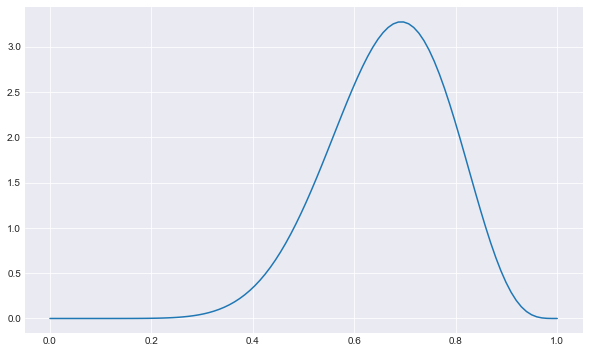

In [4]:
theta_space = np.linspace(0, 1, 100)

alpha=10
beta=5

y_pdf=stats.beta.pdf(theta_space, alpha, beta)
plt.plot(theta_space, y_pdf)
plt.show()

I will not focus on beta distribution itself too much. But I will only mention that $\alpha$ and $\beta$ shape the curve. And if we increase them proportionally, for instance put $\alpha$ = 6 and $\beta$ = 3, we will get 'fattyer bell', less certain prior idea of the parameter in question. In many publications, like in this [book](https://subscription.packtpub.com/book/data/9781789341652), it is recommended to use _weakly-informative priors_ and I totally like the idea. 

Luckily with binomial and beta distributions bayesian calculations are pretty simple - I promised! Based on the formula $P(\theta|y)$ ~ $Beta(\alpha_{prior}+y, \beta_{prior}+N-y)$ we can easily obtain the new $\alpha$ and $\beta$ for the postetior estimation of our true $\theta$

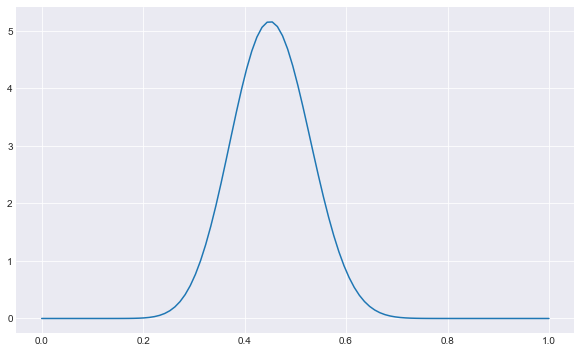

In [5]:
alpha_post=alpha+success
beta_post=beta+N-success

y_pdf=stats.beta.pdf(theta_space, alpha_post, beta_post)
plt.plot(theta_space, y_pdf)
plt.show()

## Reasonable estimation

That's it! Based on our experiment and prior beliefs of what the rate should be, we got this distribution. Let's draw some key values. Theoretical mean of beta distribution is $\mu=\alpha/(\alpha +\beta)$

In [6]:
alpha_post/(alpha_post+beta_post)

0.4523809523809524

And 90% _credible interval_. Note that this is different from confidence interval.

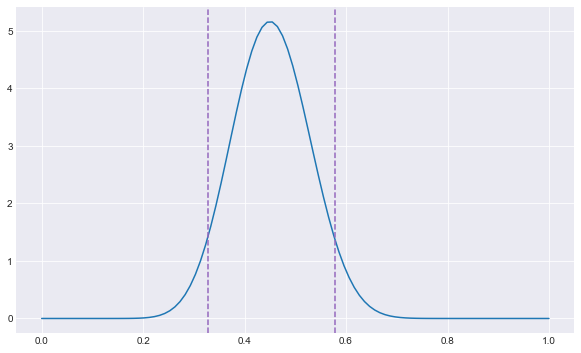

In [7]:
x1=stats.beta.ppf(0.05, alpha_post, beta_post) # limits lower 5% tail on the right
x2=stats.beta.ppf(0.95, alpha_post, beta_post) # limits upper 5% tail on the left

fig, ax = plt.subplots(1,1)
plt.plot(theta_space, y_pdf, label='pdf')
plt.axvline(x1, color='C4', linestyle='--')
plt.axvline(x2, color='C4', linestyle='--')
plt.show()

In [8]:
print(x1, x2)

0.32866582116602666 0.5787066958031966


What I would say, it is unreasonable to expect involvement in the mechanics more than 60%. At the same time we are sure at least 33% of players will get it and play it. Having this fork in our hands we can build plans.

The true beauty is that having a new data we can update the estimation. Let's say we got 10 more reviews. We simply can add the results to our $\alpha$ and $\beta$ and get more precise understanding of the $\theta$.

I hope you will find this interesting and useful no matter what domain are you are working on. More examples of such scenarios when you can easily use Bayes approach will follow.

Stay tuned!